In [6]:
from IPython.display import IFrame
IFrame("https://bahramjafrasteh.github.io/#services", 1900,1500)

# ***Unit 1: Introduction to 3D medical images and their visualization before running the DL models 🧪***




In this notebook you will learn how to **open medical images, edit the content, convert from one format to another one**. 
The recommended python packages of this study are [NiBabel](https://nipy.org/nibabel/) and [SimpleITK](https://pypi.org/project/SimpleITK/).
The first one 

❓ If you have any questions, please post them on #questions discord channel 👉 https://discord.gg/KqtpN5SF


In [ ]:
pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import emoji
#https://getemoji.com/

## Objectives of this notebook 🏆
At the end of the notebook, you will:
- 🔍 Be able to correctly **open a medical image**.
- 📚 Be able to extract **relavant information** from an image.
- 🧮 Be able to **convert** one medical image with one format to another format.
- 📍Be able to prepare your dataset for your **deep learning model**.


![picture](https://drive.google.com/uc?export=view&id=1uzHzILUsBiDuCaWED5JBccqjCtTzwZr8)

In this course, you will learn how to:

- 📖 Study medical image characteristics in **theory and practice**.
- 👩🧑 use some characteristics of **famous python libraries** such as **NiBabel**, **Numpy**, **Matplotlib**, **SciPy** to correctly preprocess and visualize 3D images.
- 🙂 **Rotate** images
- 🧐 **Resize** images
- 🤓 Image **padding**
- Augment your image data


## Prerequisites 🏯
To follow this course you need to have basic knowlege of 3D images and their characteristics and image acquisition techniques 🤝.
- 💪 Basic knowledge of **python** 👩🏼‍💻 programming is **essential**. 
- 🥳 Mathematical understanding of the rotation matrix and algebric operation are very **helpful** .

###**1) Installing the required packages**

**1. First Step**: Installing the required packages ⏳

During this notebook we need to access some package and then, we will install them here.

At first we need to know which python version we do have. Lets find it 🔎

In [ ]:
import platform
print('python version', platform.python_version())

python version 3.7.13


In [ ]:
%%capture
!pip3 install numpy
!pip3 install matplotlib
!pip3 install nibabel
!pip3 install SimpleITK
!pip3 install pydrive
!pip3 install mathjax

###**2) Extracting Information from data**

Now we are ready to load an image 🎉

In the first step, we use nibabel to import an Ultrasound image. The image is driven from the cohort of premature infants at Hospital Puerta del Mar, Cadiz, Spain. The 3D image has been anonymized and the size of image has been reduced. For the license and agreements you should contact: Prof. Dr. isabel.benavente@uca.es

In [ ]:
import os
local_download_path = os.path.expanduser('~/image')
import os
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
try:
  os.makedirs(local_download_path)
except: pass
files = drive.ListFile(
    {'q': "'1QoKMmDM07DbLphCaH_Zo8B35uwk46G5J' in parents"}).GetList()
for f in files:
  if f['title'] == 'file_inp.nii.gz':
    flocal = os.path.join(local_download_path, f['title'])
    filenew = drive.CreateFile({'id': f['id']})
    filenew.GetContentFile(flocal)
    print(flocal)
    print('successfully coppied')


/root/image/file_inp.nii.gz
successfully coppied


[NiBabel](https://nipy.org/nibabel/index.html) is a powerfull python library that satisfy our need to read, write and access to some common information of neuroimages.
It supports 💡 some common image formats such as [NIfTI1](https://nifti.nimh.nih.gov/nifti-1/) and [NIfTI2](https://nifti.nimh.nih.gov/nifti-2/).
NIfTI2 is the successor of NIfTI1 which can be used for storaging 64-bit data and large files and matrices. In this notebook we will mainaly work with **NIfTI1** files.

In [ ]:
import nibabel as nib
im = nib.load('/root/image/file_inp.nii.gz')

Now we read the file. Let's see what we can get from it. Let's get the image dimension 📐

In [ ]:
print('Number of dimensions: ',im.ndim)
print('Shape: ', im.shape)


Number of dimensions:  3
Shape:  (286, 244, 93)


One of the most importat characteristics of an image are affine matrix 👨🏿‍💻.

But what is an affine matrix?

Now we have voxel coordinate $(i, j, k)$ and we want to convert it to scanner coordinate $(x, y, z)$. How we can do it? Using a transformatin function $f$

$$(x, y, z) = f(i, j, k)$$

As scanner collects data on a regular grid, we can convert each pixel to the scanner coordinate using a linear transformation comprising **translations 🧗🏼‍♀️, rotations🤸🏼‍♀️ and scaling 🔎**.



**Scaling** matrix is:
\begin{split} \mathbf{Z} =
\begin{bmatrix}
p & 0 & 0 \\
0 & q & 0 \\
0 & 0 & r \\
\end{bmatrix}
\end{split}
Where $p$, $q$ and $r$ are the scaling in each dimension.

[**Rotation matrix**](https://en.wikipedia.org/wiki/Rotation_matrix#Basic_rotations) for the first axis can be computed as 
\begin{split} R_{x} =
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos(\theta) & -\sin(\theta) \\
0 & \sin(\theta) & \cos(\theta) \\
\end{bmatrix}
\end{split}
where $θ$ is the rotation angle.

With these two matrices we can go from voxel to space coordinates
\begin{split} \begin{bmatrix}
x'\\
y'\\
z'\\
\end{bmatrix}=M'\begin{bmatrix}
i\\
j\\
k\\
\end{bmatrix}
\end{split}
while, $M'= ZR_{x}$.

Finally, **translation** vector $(a,b,c)$
\begin{split} \begin{bmatrix}
x\\
y\\
z\\
\end{bmatrix}=\begin{bmatrix}
x'\\
y'\\
z'\\
\end{bmatrix}+
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
\end{split}
transfer the voxel to space coordinates.
The affine matrix is a combination of scaling and rotation matrix $M'$ and the translation vector $(a,b,c)$ and is written as:
\begin{split}M =
\begin{bmatrix}
m_{1,1} & m_{1,2} & m_{1,3} & a \\
m_{2,1} & m_{2,2} & m_{2,3} & b \\
m_{3,1} & m_{3,2} & m_{3,3} & c \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
\end{split}

In [ ]:
affine = im.affine
print('Affine matrix: \n', affine)

Affine matrix: 
 [[  0.69999999   0.           0.         -99.68808746]
 [  0.           0.80000001   0.         -96.853508  ]
 [  0.           0.           1.20000005   2.49426508]
 [  0.           0.           0.           1.        ]]


Another important inforamtion that you can get from the **affine** matrix is the header.

It can give you some information about the spacing in each dimension.
The spacing in the $x,y, z$ direction can be extracted from form the affine matrix too.



In [ ]:
print('header',im.header)

header <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 286 244  93   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.  0.7 0.8 1.2 1.  1.  1.  1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'VTK9.0.1'
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -99.68809
qoffset_y       : -96.85351
qoffset_z       : 2.494265
srow_x         

In [ ]:
print('spacing in x, y, and z, respectively: ',im.header['pixdim'][1:4])

spacing in x, y, and z, respectively:  [0.7 0.8 1.2]


###**3) Image Visualization**

Now we can visualize the image

In [ ]:
def plot_3axis(im, text=''):
    shape = im.shape
    plt.imshow(np.rot90(im[:, :, shape[2] // 2]), cmap='gray')
    plt.axis('off')
    plt.savefig("axial_{}.png".format(text), bbox_inches='tight')
    plt.imshow(np.rot90(im[:, shape[1] // 2, :])[::-1], cmap='gray')
    plt.axis('off')
    plt.savefig("coronal_{}.png".format(text), bbox_inches='tight')

    plt.imshow(np.fliplr(np.rot90(im[shape[0] // 2, :, :])[::-1]), cmap='gray')
    plt.axis('off')
    plt.savefig("sagittal_{}.png".format(text), bbox_inches='tight')

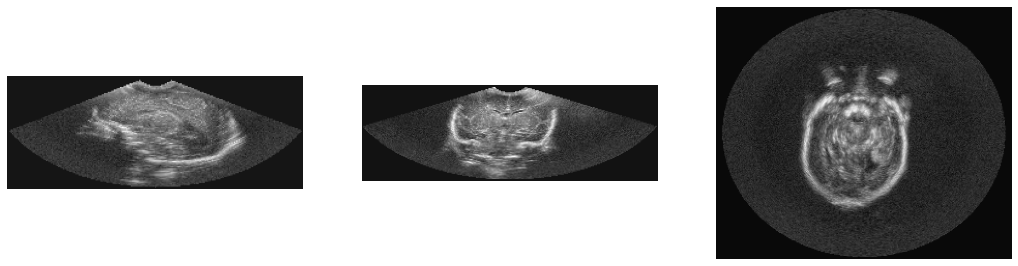

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

shape = im.shape
center = [l//2 for l in shape]
image = im.get_fdata()

fig, axs = plt.subplots(1,3, figsize=(18,16))
axs[0].imshow(np.fliplr(np.rot90(image[center[0], :, :])[::-1]), cmap='gray')
axs[0].axis('off')
axs[1].imshow(np.rot90(image[:, center[1], :])[::-1], cmap='gray')
axs[1].axis('off')
axs[2].imshow(np.rot90(image[:, :, center[2]]), cmap='gray', label='axial')
axs[2].axis('off')
plt.show()


###**4) Image resizing**

Now we know that the image spacing in each axis differs from the others.
To generate equal spacing image we need to resize the image.
There is a function already implemetned in NiBabel for this purpose.

In [ ]:
from nibabel.processing import resample_to_output
NewSpacing=1.0
im_resized = resample_to_output(im, [NewSpacing, NewSpacing, NewSpacing])
image_resized = im_resized.get_fdata()

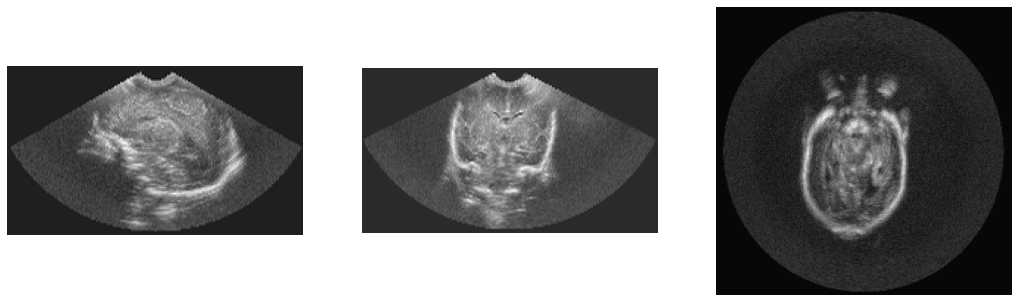

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(18,16))
center = [l//2 for l in image_resized.shape]
axs[0].imshow(np.fliplr(np.rot90(image_resized[center[0], :, :])[::-1]), cmap='gray')
axs[0].axis('off')
axs[1].imshow(np.rot90(image_resized[:, center[1], :])[::-1], cmap='gray')
axs[1].axis('off')
axs[2].imshow(np.rot90(image_resized[:, :, center[2]]), cmap='gray', label='axial')
axs[2].axis('off')
plt.show()

##**. Data Augmentation**

📚 **Data augmentation** is a very important operation to fasten training of deep learning models and also to increase the generalization ability of the model.
Depending on the problem in hand, different data augmentation methods can be employed. In this notebook, iamge rotation and image enhancement are discussed. Next, we will guide you how to save an image after augmenting the data.

**5.1 Image rotation**

In [ ]:
from scipy.ndimage import affine_transform
def R_x(theta):
    # https://en.wikipedia.org/wiki/Rotation_matrix#Basic_rotations
    """ Rotation aroud x axis
    """
    cosine = np.cos(theta)
    sinus = np.sin(theta)
    return np.array([[1, 0, 0, 0],
                     [0, cosine, -sinus, 0],
                     [0, sinus, cosine, 0],
                     [0, 0, 0, 1]])
    
def ImRotate(im,deg):
    """
    im: numpy array
    deg: rotation degree
    offset: offset for affine_transformation
    """
    theta = deg * np.pi / 180
    M = R_x(theta)
    affine_transformed = affine_transform(np.asarray(im), np.asarray(M[:-1, :-1]),
                               output_shape=im.shape, offset=0)
    return affine_transformed

From previous section we know how to compute the rotation matrix.
To rotate an image an affine transformation is employed for SciPy python library.

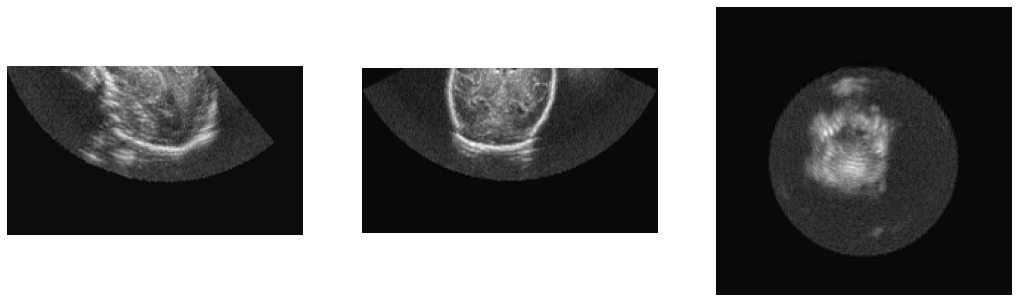

In [ ]:

rotated_im = ImRotate(image_resized, 20)
fig, axs = plt.subplots(1,3, figsize=(18,16))
center = [l//2 for l in rotated_im.shape]
axs[0].imshow(np.fliplr(np.rot90(rotated_im[center[0], :, :])[::-1]), cmap='gray')
axs[0].axis('off')
axs[1].imshow(np.rot90(rotated_im[:, center[1], :])[::-1], cmap='gray')
axs[1].axis('off')
axs[2].imshow(np.rot90(rotated_im[:, :, center[2]]), cmap='gray', label='axial')
axs[2].axis('off')
plt.show()

Now you can see the rotation is not good as it removes one part of the image. 

👉 **Task** find the key to solve this problem!
You can use internet

📜(*hint) Read help function of affine_transform


👉 **Task** Rotate images in different coordinates

📜(*hint) Write rotation matrix for $R_{y}$ and $R_{z}$.

**5.2 Image enhancement**

$I' = \alpha I + \beta$

where $\alpha$ and $\beta$ are the factors to change image brightness and contrast.

alpha: 1.3, beta :15.299999999999999


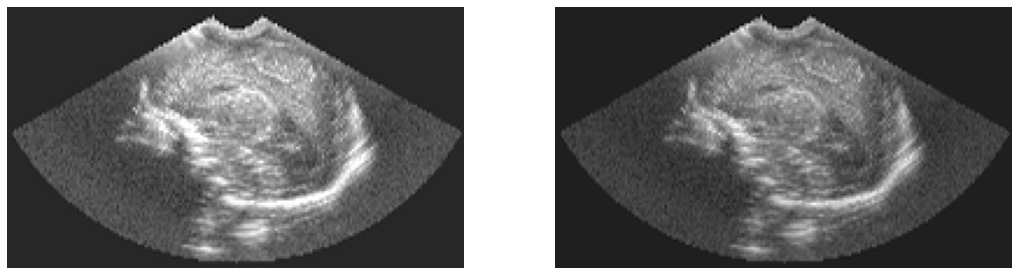

In [ ]:
alpha = float(np.around(np.random.uniform(0.5, 1.5, size=1), 2))
beta = float(np.around(np.random.uniform(0.01, 0.1, size=1), 2))
beta *= image_resized.max()
image_enhanced = image_resized.copy()* alpha+beta
image_enhanced[image_enhanced<0]=0
image_enhanced[image_enhanced>255]=255.
minI = max(image_enhanced.min(),0)
maxI = min(image_enhanced.max(),256)

print('alpha: {}, beta :{}'.format(alpha, beta))

fig, axs = plt.subplots(1,2, figsize=(18,16))
center = [l//2 for l in image_enhanced.shape]
axs[0].imshow(np.fliplr(np.rot90(image_enhanced[center[0], :, :])[::-1]), cmap='gray')
axs[0].axis('off')
axs[1].imshow(np.fliplr(np.rot90(image_resized[center[0], :, :])[::-1]), cmap='gray')
axs[1].axis('off')
plt.show()


**5.3 Image Cropping**




In [ ]:
crop_im = image_resized[10:-10, :-10, 10:-20]



**5.4 Image Zooming**

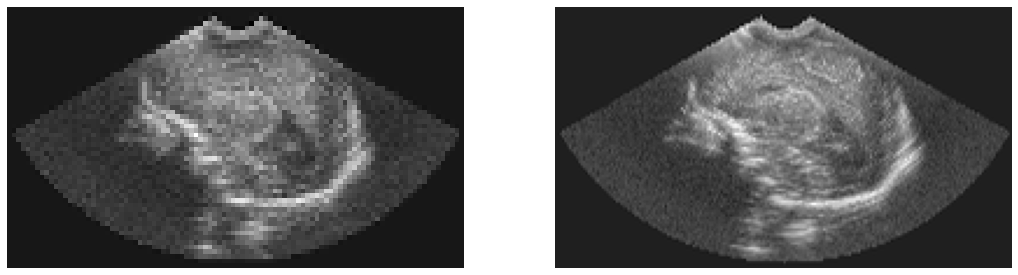

In [ ]:
from scipy.ndimage import zoom
scaling_factor = 3

scaled_im = zoom(image_resized.astype(np.uint8), zoom=scaling_factor, order=3)

fig, axs = plt.subplots(1,2, figsize=(18,16))
center = [l//2 for l in scaled_im.shape]
axs[0].imshow(np.fliplr(np.rot90(scaled_im[center[0], :, :])[::-1]), cmap='gray')
axs[0].axis('off')
center = [l//2 for l in image_resized.shape]
axs[1].imshow(np.fliplr(np.rot90(image_resized[center[0], :, :])[::-1]), cmap='gray')
axs[1].axis('off')
plt.show()

##**6. Saving NiFTi**

In [ ]:
nifti_im = nib.Nifti1Image(image_resized, affine, header=None)
nib.save(nifti_im,'/root/image/file_resized.nii.gz')

Success!
Congratualation you learned basic of preprocessing of images for DL 👩‍🎓👨‍🎓